In [3]:
import random
import numpy as np
import mmcv
from tools_custom.dataset import *
from pathlib import Path
import pprint
from PIL import Image
from collections import defaultdict
from tools_custom.config import cfg
from mmdet.datasets import get_dataset


train_dataset = get_dataset(cfg.data.train)

In [4]:
val = mmcv.load('/home/arias/Projects/python/jinnan_chusai_mmdet/data/dataset/val.json')

In [5]:
val.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [11]:
sample

{'coco_url': '',
 'data_captured': '',
 'file_name': '190104_151915_00150525.jpg',
 'id': 2734,
 'flickr_url': '',
 'license': 1,
 'height': 261,
 'width': 377,
 'filename': '190104_151915_00150525.jpg',
 'ann': {'bboxes': array([], shape=(0, 4), dtype=float32),
  'labels': array([], dtype=int64),
  'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
  'masks': [],
  'mask_polys': [],
  'poly_lens': []}}

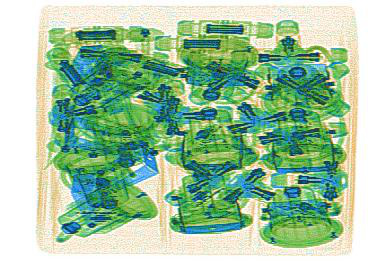

In [10]:
def get_sample(idx=None):
    if idx is None:
        idx = random.randint(0, len(train_dataset.img_infos))
    img = train_dataset.img_infos[idx].copy()
    img['ann'] = train_dataset.get_ann_info(idx)
    return img

sample = get_sample()
img = Image.open(str(Path(train_dataset.img_prefix, sample['filename'])))
bboxes = sample['ann']['bboxes']
labels = sample['ann']['labels']
polygons = sample['ann']['mask_polys']


mmcv.imshow_polygon_bboxes(img, bboxes=bboxes, polygons=polygons, polygon_color='red', labels=labels, thickness=2, text_color='green')

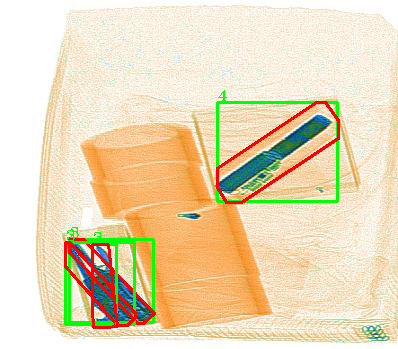

In [38]:
def get_sample(idx=None):
    if idx is None:
        idx = random.randint(0, len(train_dataset.img_infos))
    img = train_dataset.img_infos[idx].copy()
    img['ann'] = train_dataset.get_ann_info(idx)
    return img

sample = get_sample()
img = Image.open(str(Path(train_dataset.img_prefix, sample['filename'])))
bboxes = sample['ann']['bboxes']
labels = sample['ann']['labels']
polygons = sample['ann']['mask_polys']


mmcv.imshow_polygon_bboxes(img, bboxes=bboxes, polygons=polygons, polygon_color='red', labels=labels, thickness=2, text_color='green')

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [31]:
def create_mask_for_plant(image, color_space='bgr'):
    if color_space=='bgr':
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    elif color_space=='rgb':
        image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    else:
        raise TypeError('color_space must be "bgr" or "rgb"')

    hsv = [27, 56, 99]
    sensitivity = 20
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image, color_space='rgb')
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

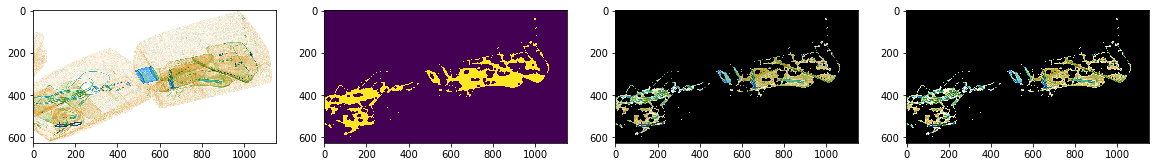

In [36]:
image = np.array(img)

image_mask = create_mask_for_plant(image, color_space='rgb')
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)